In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
MODULATOR_FREQUENCY = 2.0
CARRIER_FREQUENCY = 20.0
MODULATION_INDEX = 1.0

SAMPLES = 44100.0
DURATION_SECONDS = 2

In [76]:
# Create an array of 44100 elements with value from 0.0 to 1.0
time = np.arange(SAMPLES * DURATION_SECONDS) / SAMPLES

Text(0.5, 0, 't (s)')

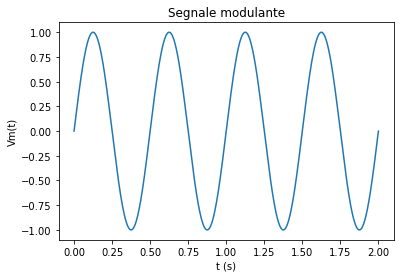

In [77]:
# Modulator signal
modulator = np.sin(2.0 * np.pi * MODULATOR_FREQUENCY * time) * MODULATION_INDEX

plt.title('Segnale modulante')
plt.plot(time, modulator)
plt.ylabel('Vm(t)')
plt.xlabel('t (s)')

Text(0.5, 0, 't (s)')

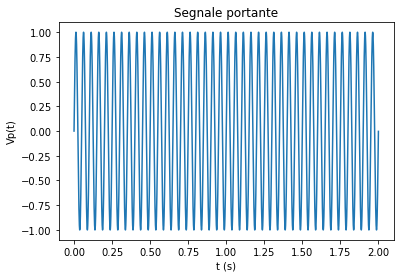

In [78]:
# Carrier signal
carrier = np.sin(2.0 * np.pi * CARRIER_FREQUENCY * time)

plt.title('Segnale portante')
plt.plot(time, carrier)
plt.ylabel('Vp(t)')
plt.xlabel('t (s)')

Text(0.5, 0, 't (s)')

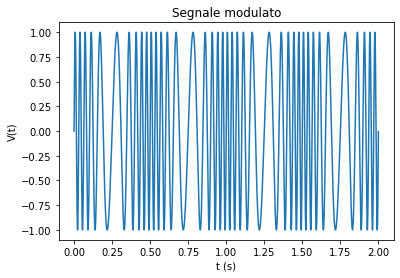

In [79]:
# Modulated signal
modulated = np.zeros_like(modulator)

for i, t in enumerate(time):
    modulated[i] = np.sin(2.0 * np.pi * (CARRIER_FREQUENCY * t + modulator[i]))

plt.title('Segnale modulato')
plt.plot(time, modulated)
plt.ylabel('V(t)')
plt.xlabel('t (s)')

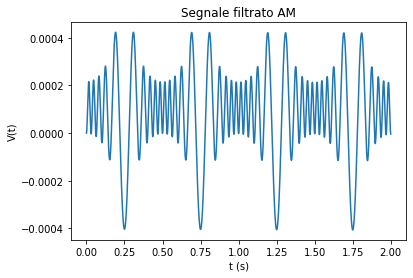

In [80]:
# Filtered signal
filtered = np.zeros_like(modulated)

R = 50 # Ohm
C = 0.00000001 # Farad

a = R * C

filtered[0] = a * modulated[0]
for i in range(1, len(modulated)):
    filtered[i] = filtered[i - 1] + a * (modulated[i] - filtered[i - 1])

plt.title('Segnale filtrato AM')
plt.plot(time, filtered)
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.show()

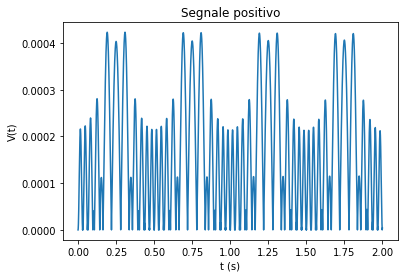

In [81]:
# Positive signal
positive = np.zeros_like(filtered)

for i, signal in enumerate(filtered):
    positive[i] = abs(filtered[i])

plt.title('Segnale positivo')
plt.plot(time, positive)
plt.ylabel('V(t)')
plt.xlabel('t (s)')

plt.show()